In [ ]:
#Description: This program predicts the price of google stock for a specific day

In [ ]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving datasets_20469_26460_Google_Stock_Price_Test.csv to datasets_20469_26460_Google_Stock_Price_Test (1).csv


In [ ]:
#Store arid look at data
df = pd.read_csv('datasets_20469_26460_Google_Stock_Price_Test.csv')
df

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
#Get and print the last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Volume
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


In [ ]:
#Prepare the data for the training
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
#Create an empty list to store the independent and dependent data
days = list()
adj_close_prices = list()

In [ ]:
#Get the date and the adjusted close price
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Close']

In [ ]:
#create the independent dataset
for day in df_days:
  days.append([int(day.split('/')[1])])

#Create a dependent dataset
for adj_close_price in df_adj_close:
  adj_close_prices.append( float(adj_close_price) )

In [ ]:
#Create the 3 Support Vector Regression Models

#Create and train a SVR model using a linear kernel
lin_svr = SVR(kernel= 'linear',C=1000.0)
lin_svr.fit(days, adj_close_prices)

#Create and train a SVR model using a polynomial kernel
poly_svr = SVR(kernel= 'poly',C=1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

#Create and train a SVR model using a rbf kernel
rbf_svr = SVR(kernel= 'rbf',C=1000.0, gamma = 0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

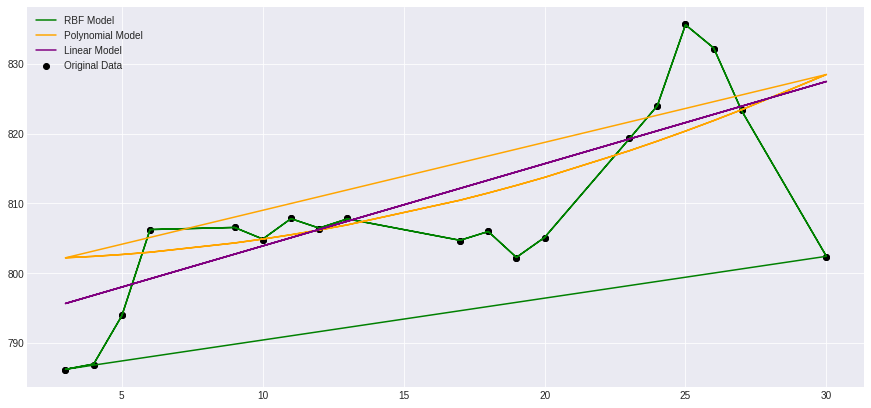

In [ ]:
#Plot the models on a graph to see which has the best fit to original data
plt.figure(figsize=(15,7))
plt.scatter(days, adj_close_prices, color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='purple', label = 'Linear Model')
plt.legend()
plt.show()

In [ ]:
#Show the predict price for the given day
day = [[30]]

print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))


The RBF SVR predicted:  [802.41957385]
The Linear SVR predicted:  [827.45090909]
The Polynomial SVR predicted:  [828.45054878]


In [ ]:
#Print the actual price
print('The Actual price: ', actual_price['Close'][19])

The Actual price:  796.79
